In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

import repository as repo

In [2]:
base_repo = "https://api.github.com/users/{user}/repos" 

In [3]:
columns = [
 'name',
 'fork',
 'created_at',
 'updated_at',
 'pushed_at',
 'size',
 'stargazers_count',
 'watchers_count',
 'language',
 'has_issues',
 'has_projects',
 'has_downloads',
 'has_wiki',
 'has_pages',
 'forks_count',
 'archived',
 'disabled',
 'open_issues_count',
 'forks',
 'open_issues',
 'watchers',
 'default_branch'
]

In [4]:
user = "gsdenys"

# Repositories

In [5]:
df = repo.getRepos(user)
df

,name,fork,created_at,updated_at,pushed_at,size,stargazers_count,watchers_count,language,has_issues,...,has_pages,forks_count,archived,disabled,open_issues_count,forks,open_issues,watchers,default_branch,year
0,alf-db-constraint,False,2016-01-29 01:27:23+00:00,2017-08-09 11:32:25+00:00,2016-03-09 13:10:27+00:00,31,4,4,Java,True,...,False,0,False,False,0,0,0,4,master,2016
1,alfresco-bulk-export,False,2015-07-29 00:36:35+00:00,2019-09-19 11:17:25+00:00,2018-10-27 14:02:58+00:00,215,11,11,Java,True,...,False,32,False,False,17,32,17,11,master,2015
2,amqp-client,False,2019-07-16 13:52:44+00:00,2020-09-27 09:41:13+00:00,2021-01-20 14:21:50+00:00,178,5,5,Lua,True,...,True,7,False,False,6,7,6,5,master,2019
3,bpm-engine,False,2020-02-17 18:07:22+00:00,2020-02-17 18:23:29+00:00,2020-02-17 18:23:26+00:00,7,0,0,Go,True,...,False,0,False,False,0,0,0,0,master,2020
4,cmis-java-sample,False,2014-12-04 12:35:44+00:00,2015-03-23 14:09:08+00:00,2015-03-23 14:09:08+00:00,124,1,1,Java,True,...,False,0,False,False,0,0,0,1,master,2014
5,cmis-persistence-api,False,2016-12-13 11:45:29+00:00,2016-12-13 11:49:08+00:00,2017-01-04 12:31:14+00:00,9200,0,0,Java,True,...,False,0,False,False,0,0,0,0,master,2016
6,cmis-sample-test-case,False,2016-12-24 13:27:12+00:00,2016-12-24 13:27:31+00:00,2016-12-24 17:07:13+00:00,129,0,0,Shell,True,...,False,0,False,False,0,0,0,0,master,2016
7,config,True,2021-01-05 01:02:55+00:00,2021-01-05 01:02:57+00:00,2021-01-04 02:21:41+00:00,53,0,0,None,False,...,False,0,False,False,0,0,0,0,main,2021
8,content-store,False,2017-10-30 11:12:57+00:00,2017-10-30 11:13:56+00:00,2017-10-30 11:13:55+00:00,17,0,0,Python,True,...,False,0,False,False,0,0,0,0,master,2017
9,content-store-common,False,2017-08-05 23:47:14+00:00,2017-11-28 16:25:12+00:00,2017-08-29 00:44:37+00:00,89,0,0,Java,True,...,True,0,False,False,0,0,0,0,master,2017


## Languages

In [6]:
df1 = repo.creationFromYear(df)

<AxesSubplot:title={'center':'Criação de Repositórios por Linguagem e por Ano'}, xlabel='year'>

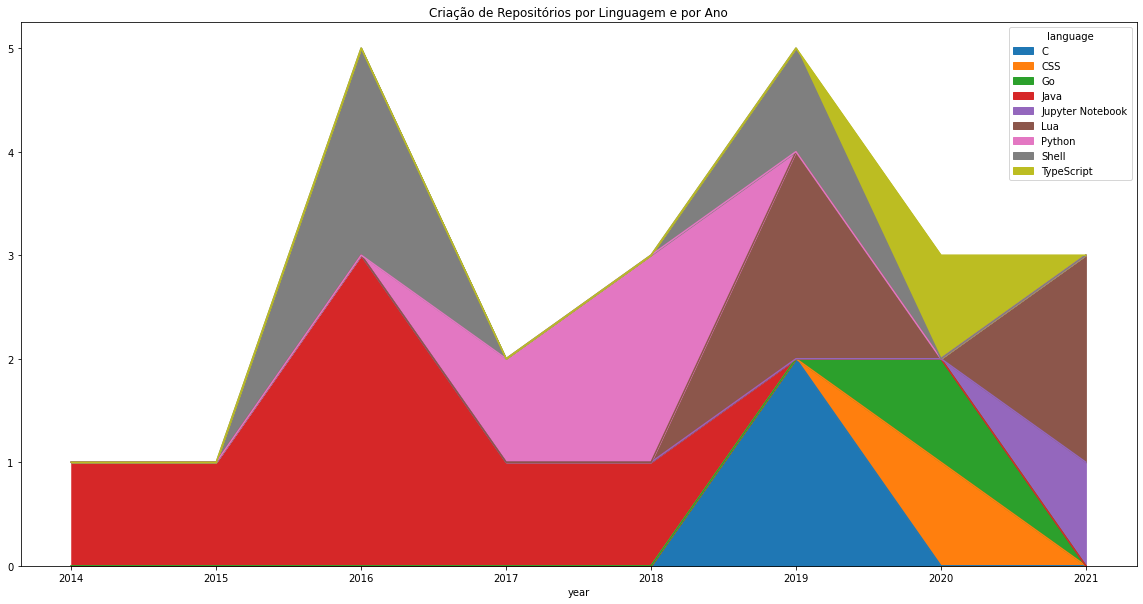

In [7]:
df1.plot(kind="area", figsize=(20,10), title="Criação de Repositórios por Linguagem e por Ano")

## Quantidade de Código

In [8]:
languages = df[["language", "year", "size"]]
lg1 = languages.groupby(["language", "year"])["size"].sum().reset_index(name="size")

df2 = lg1.pivot(index='year', columns='language', values='size')
df2 = df2.fillna(0)

df2

language,C,CSS,Go,Java,Jupyter Notebook,Lua,Python,Shell,TypeScript
year,,,,,,,,,
2014,0.0,0.0,0.0,124.0,0.0,0.0,0.0,0.0,0.0
2015,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0
2016,0.0,0.0,0.0,9440.0,0.0,0.0,0.0,1131.0,0.0
2017,0.0,0.0,0.0,89.0,0.0,0.0,17.0,0.0,0.0
2018,0.0,0.0,0.0,1455.0,0.0,0.0,437.0,0.0,0.0
2019,452.0,0.0,0.0,0.0,0.0,316.0,0.0,132.0,0.0
2020,0.0,13739.0,7.0,0.0,0.0,0.0,0.0,0.0,3510.0
2021,0.0,0.0,0.0,0.0,463.0,5.0,0.0,0.0,0.0


<AxesSubplot:title={'center':'Criação de Código por Linguagem por Ano'}, xlabel='year'>

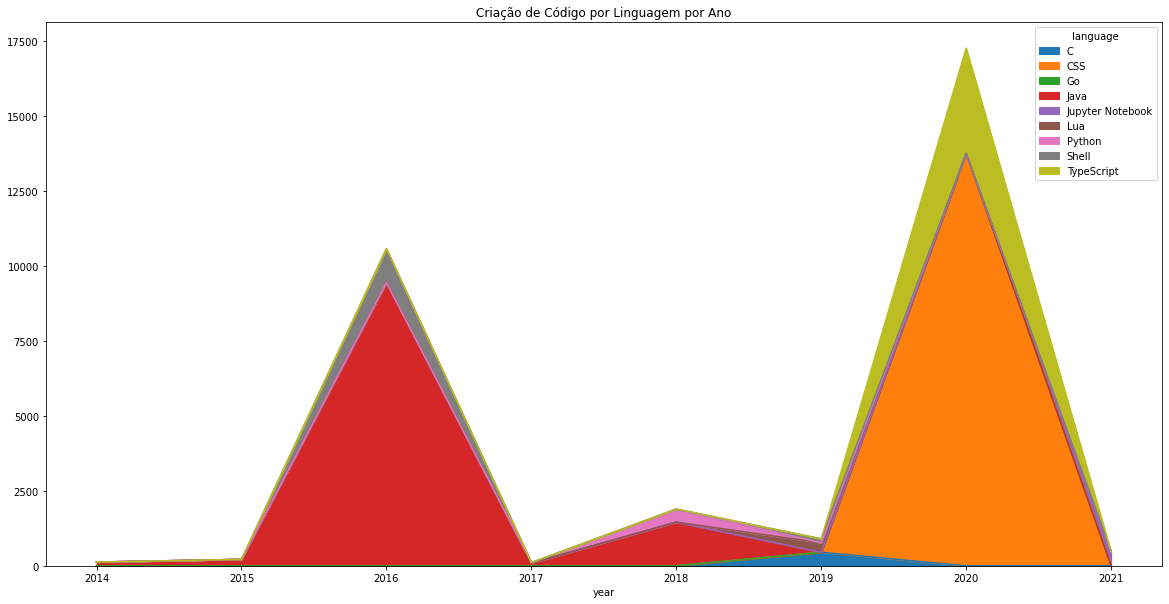

In [9]:
df2.plot(kind="area", figsize=(20,10), title="Criação de Código por Linguagem por Ano")